<a href="https://colab.research.google.com/github/mohammedhemed77/DL-Course-UDL-Book-Based-/blob/main/Implementations/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Why we are here ?

Our target is to find a function that describe our data with satisfying error that is suitale to the type of the problem

# ML = FUNCTION APPROXIMATION ,
 as the function which all of us seeking to find is not  (exist)  :D


We start our journy by The simplest problem is to find a function that best describe the data linearly.

In [1]:
# Numpy library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

# Creating dataset

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ] (12,)
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ] (12,)


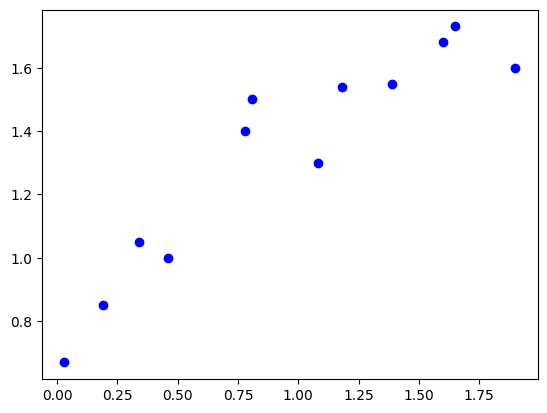

In [2]:
# Create small dataset
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])
print(x,x.shape)
print(y,y.shape)

# Plot a line connecting the points
#plt.plot(x, y, marker='o', linestyle='-', color='r', label='Line Plot')

# Create scatter plot
plt.scatter(x, y, color='blue', marker='o', label='Data Points')

# Define 1D linear regression model

In [3]:
# y = m x + b
def f(x, phi0, phi1):
  y = x * phi1 + phi0
  return y

# Plot the function

In [4]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig, ax = plt.subplots()
    ax.scatter(x, y, color='blue', label='Data Points')  # Scatter plot of data points

    # Set axis limits
    plt.xlim([0, 2.0])
    plt.ylim([0, 2.0])

    # Set labels
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'r-',lw=2)

    plt.show()

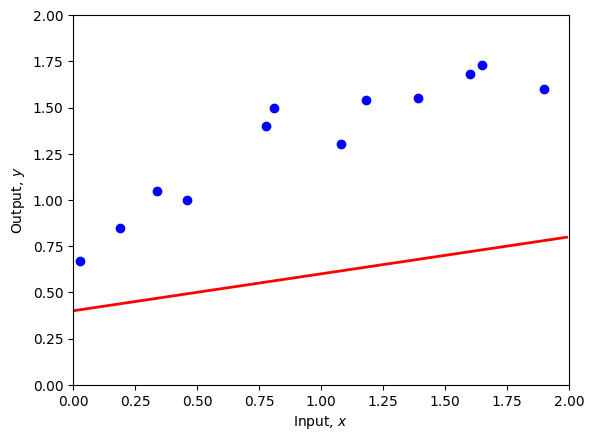

In [5]:
# display dataset + the line of equation (y = phi0 + phi1 * x)
# We choose arbitrary values             (y = 0.4  + (0.2)  * x)

# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

# Calculate the loss

In [6]:
# loss = (y - ((phi1 * x) + phi0))^2
# dphi0 = - 2 (y - ((phi1 * x) + phi0 ))

def compute_loss(x,y,phi0,phi1):
  loss = np.mean((y - f(x,phi0,phi1))**2)
  return loss

# Ground truth
represents the actual loss value that we expect if our model is correctly tuned.
we expect our model loss = somevalue
then we calculate the loss and compare it with ground truth value
(actual loss value) to check that we write our loss function correctly

# to make the comaprison fair :
we divide ground truth or actual loss for each example by N as this values
depend on squared loss but we using mean least squares loss




\begin{equation}
L[\boldsymbol\phi] = \sum_{i=1}^{I}(y_{i}-\text{f}[x_{i},\boldsymbol\phi])^2
\end{equation}


In [14]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
# debug print function
print(f'Your Loss = {loss:3.2f}, Ground truth = ' ,7.07/12)

Your Loss = 0.02, Ground truth =  0.5891666666666667


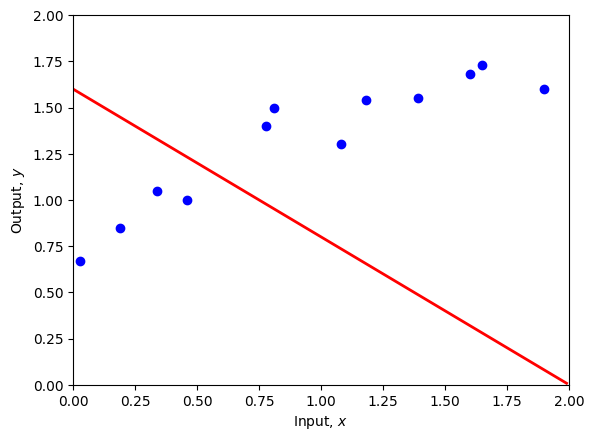

Your Loss = 0.86, Ground truth = 0.8566666666666666


In [15]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =',10.28/12)

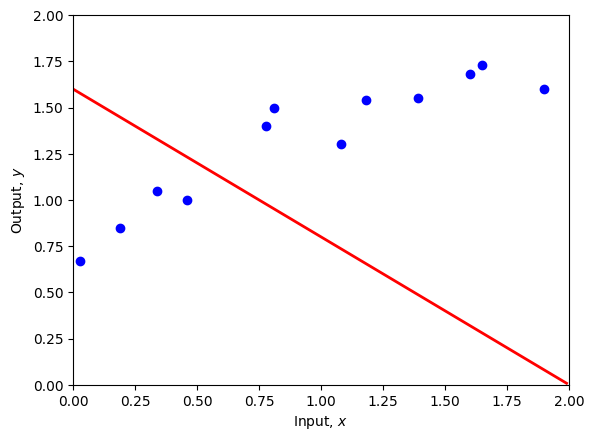

Your Loss = 0.86


In [16]:
# initialize wieghts :
phi0 = 1.60 ; phi1 =-0.8
plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

# Gradient Descent

In [17]:

def gradient_descent(x, y, phi0, phi1, lr=0.1, iterations=100):
    for _ in range(iterations):

        d_phi0 = -2 * np.mean(y - (phi0 + phi1 * x))  # Partial derivative w.r.t. phi0
        d_phi1 = -2 * np.mean(x * (y - (phi0 + phi1 * x)))  # Partial derivative w.r.t. phi1

        phi0 -= lr * d_phi0  # Update phi0
        phi1 -= lr * d_phi1  # Update phi1

        loss = compute_loss(x, y, phi0, phi1)
        # debug print function
        print(f'phi0: {phi0:.3f}, phi1: {phi1:.3f}, Loss: {loss:.3f}')
        plot(x,y,phi0,phi1)
    return phi0, phi1

# training

phi0: 1.697, phi1: -0.616, Loss: 0.511


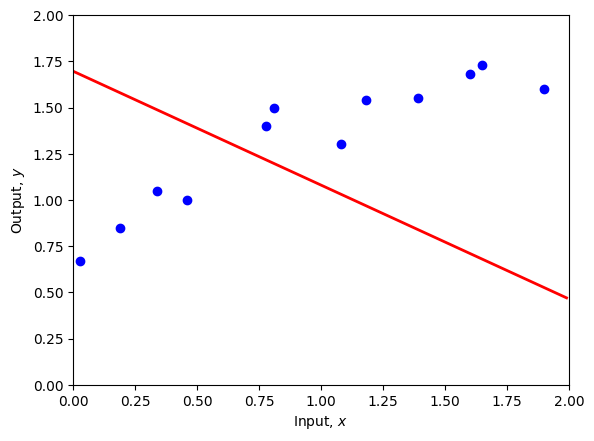

phi0: 1.739, phi1: -0.497, Loss: 0.380


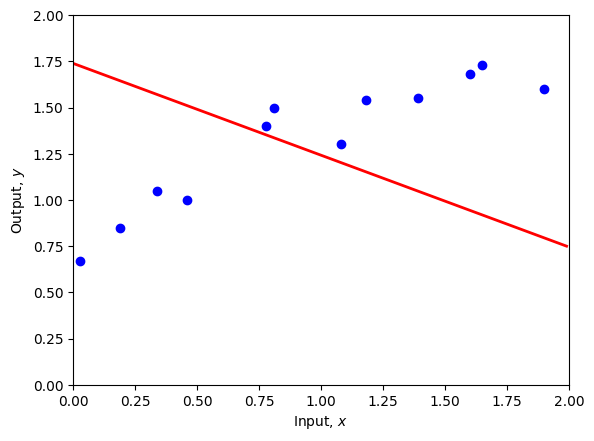

phi0: 1.750, phi1: -0.416, Loss: 0.323


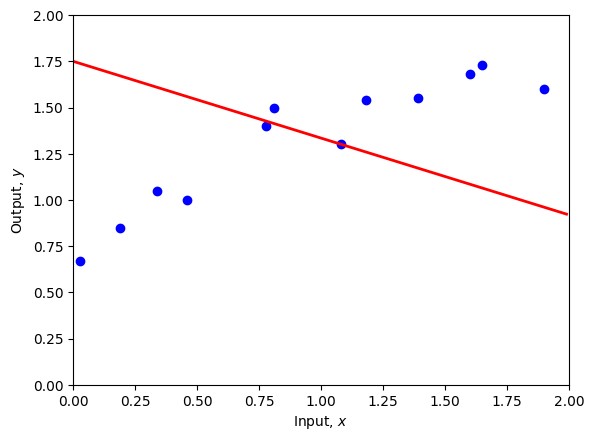

phi0: 1.744, phi1: -0.357, Loss: 0.291


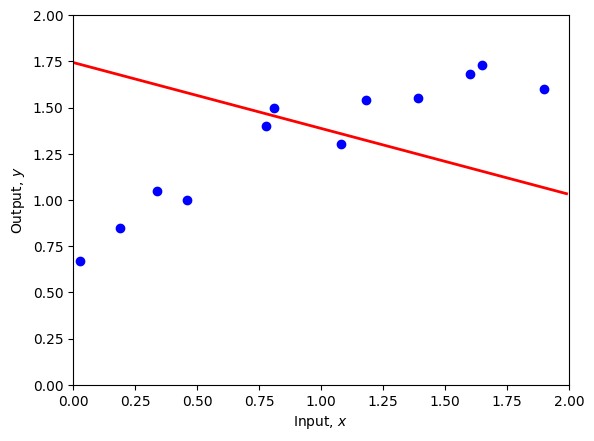

phi0: 1.727, phi1: -0.311, Loss: 0.270


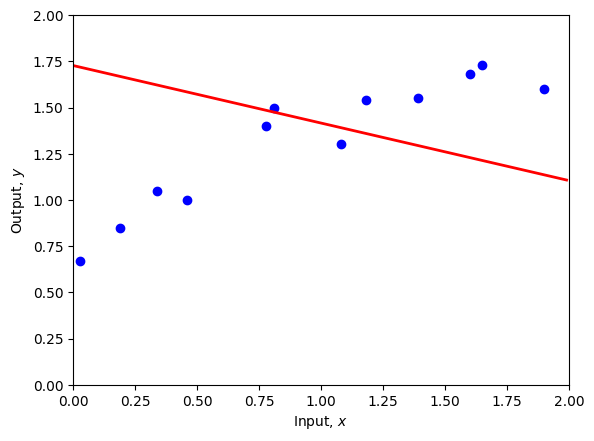

phi0: 1.706, phi1: -0.274, Loss: 0.252


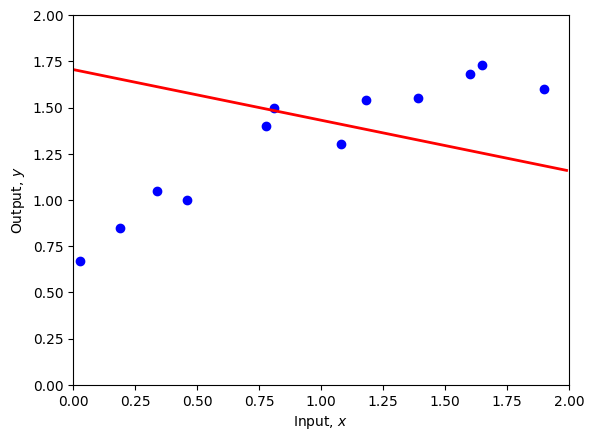

phi0: 1.681, phi1: -0.242, Loss: 0.236


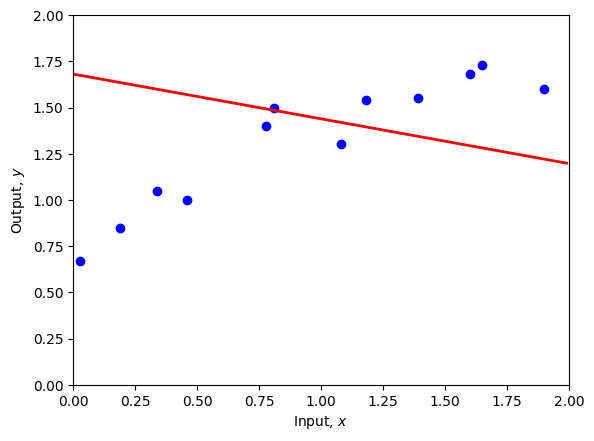

phi0: 1.655, phi1: -0.214, Loss: 0.221


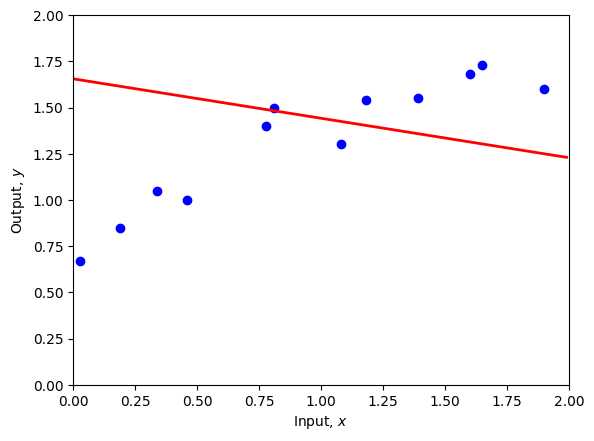

phi0: 1.629, phi1: -0.187, Loss: 0.208


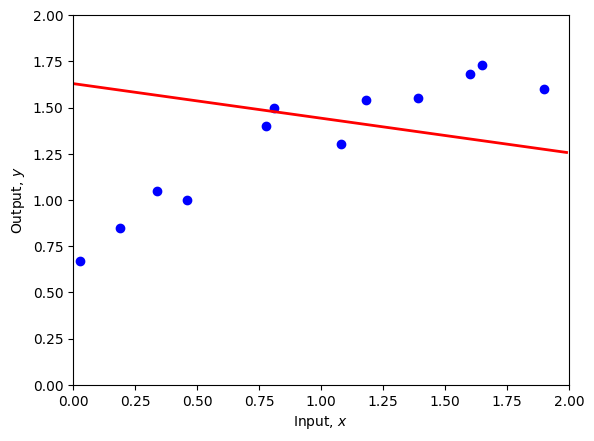

phi0: 1.604, phi1: -0.163, Loss: 0.195


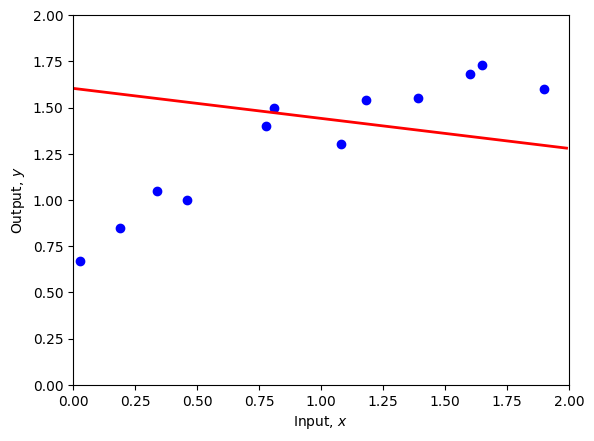

phi0: 1.578, phi1: -0.139, Loss: 0.184


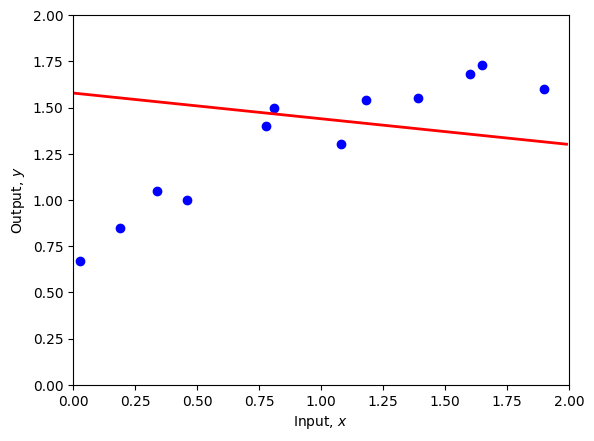

phi0: 1.554, phi1: -0.117, Loss: 0.173


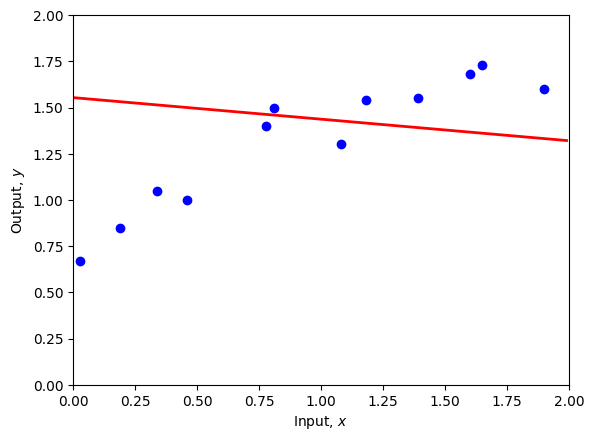

phi0: 1.530, phi1: -0.095, Loss: 0.163


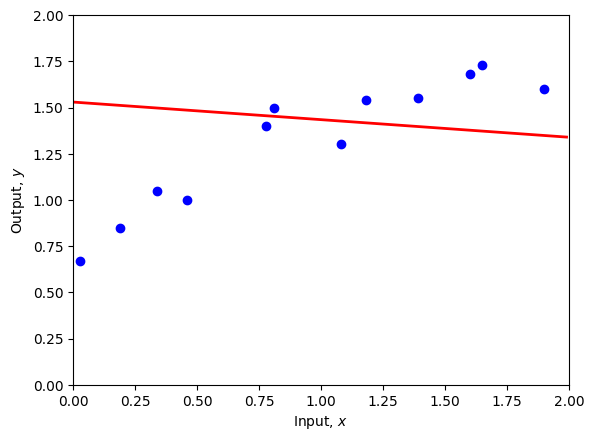

phi0: 1.506, phi1: -0.075, Loss: 0.153


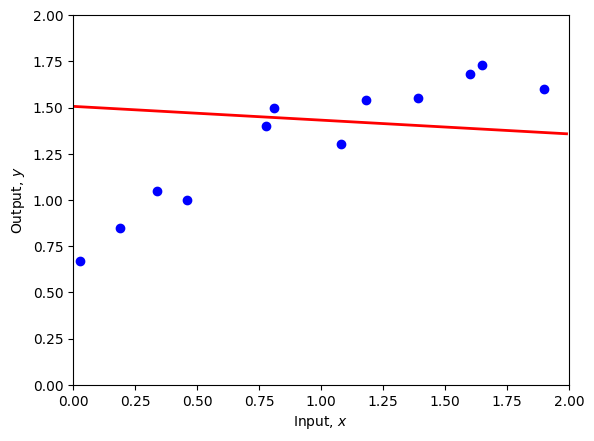

phi0: 1.484, phi1: -0.055, Loss: 0.144


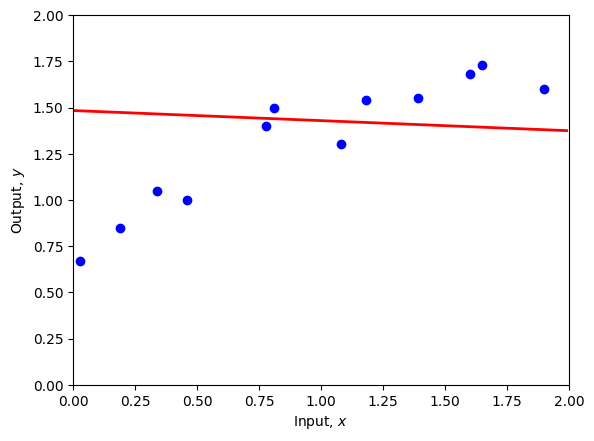

phi0: 1.462, phi1: -0.035, Loss: 0.136


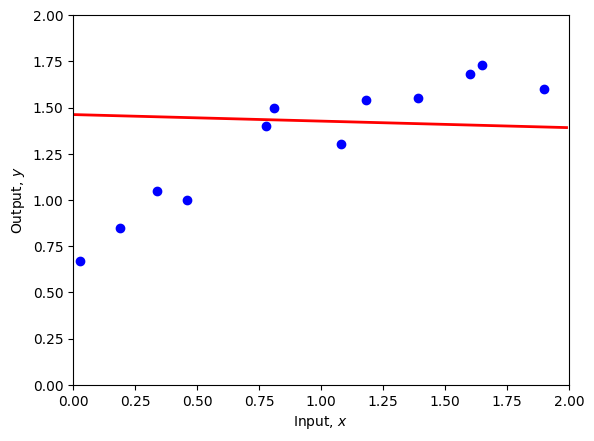

phi0: 1.441, phi1: -0.017, Loss: 0.128


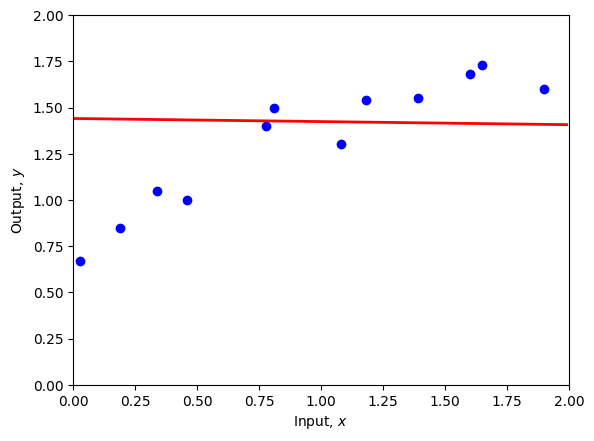

phi0: 1.420, phi1: 0.001, Loss: 0.121


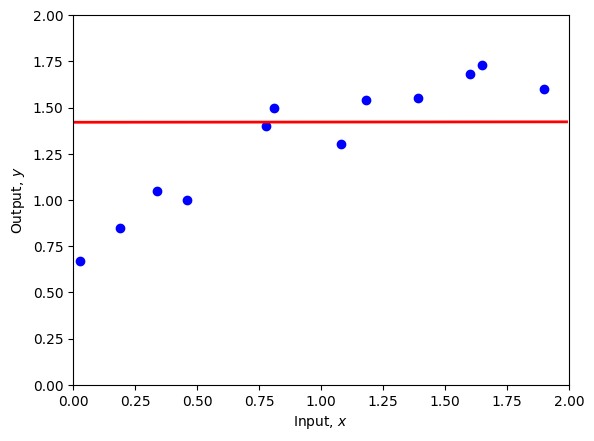

phi0: 1.400, phi1: 0.019, Loss: 0.114


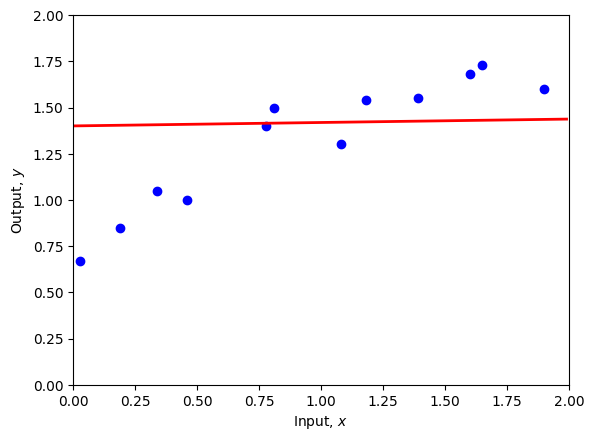

phi0: 1.381, phi1: 0.035, Loss: 0.107


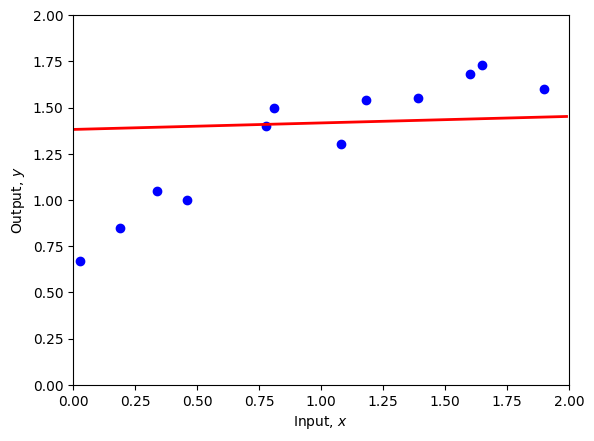

phi0: 1.363, phi1: 0.051, Loss: 0.102


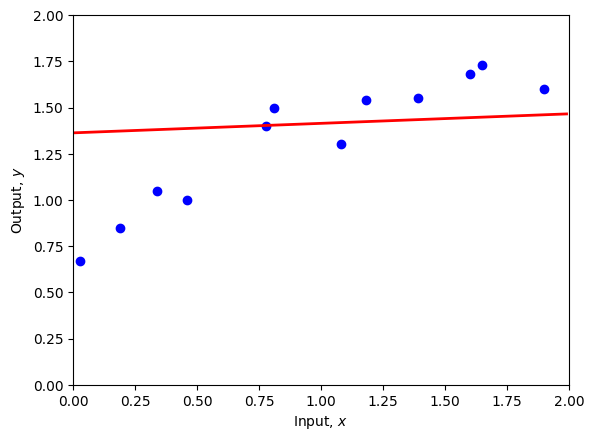

phi0: 1.345, phi1: 0.067, Loss: 0.096


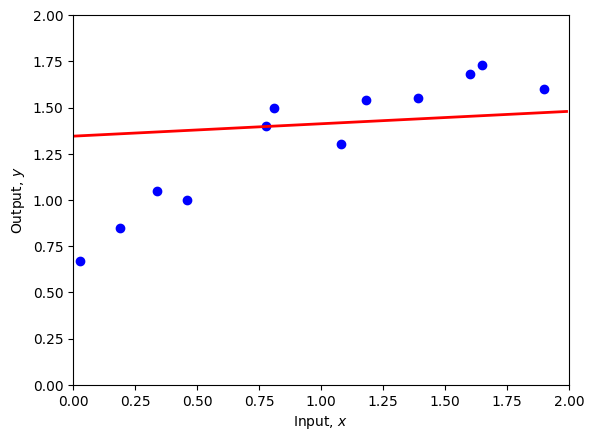

phi0: 1.328, phi1: 0.082, Loss: 0.091


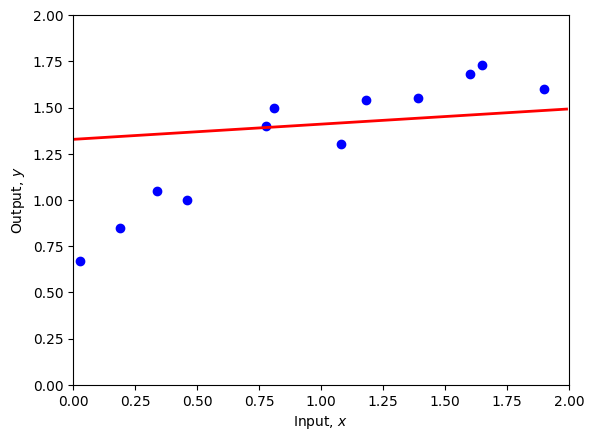

phi0: 1.311, phi1: 0.097, Loss: 0.086


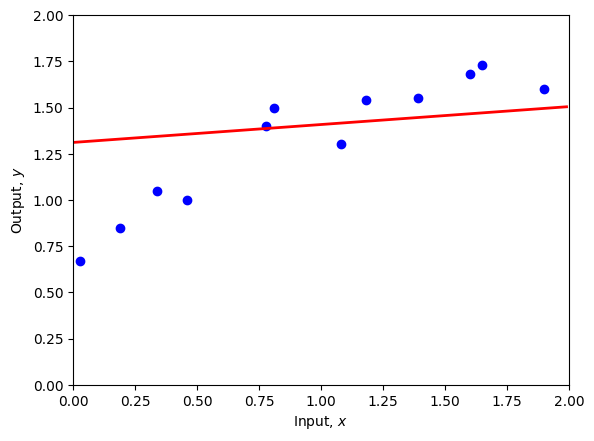

phi0: 1.295, phi1: 0.111, Loss: 0.081


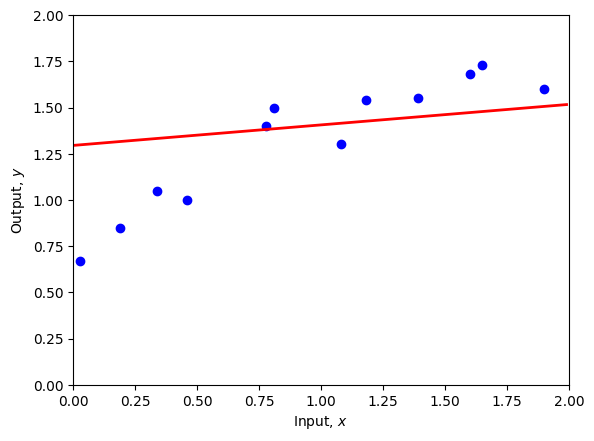

phi0: 1.279, phi1: 0.125, Loss: 0.077


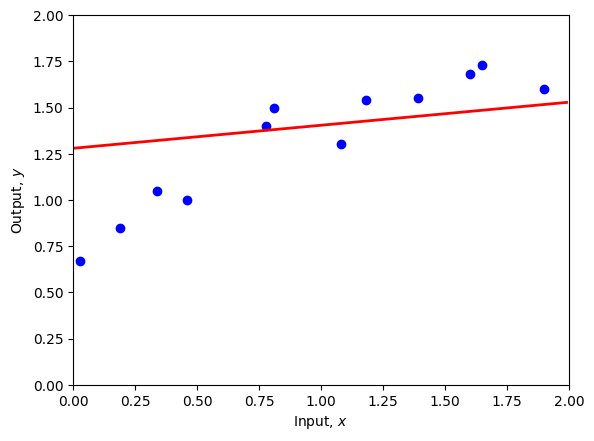

phi0: 1.264, phi1: 0.138, Loss: 0.073


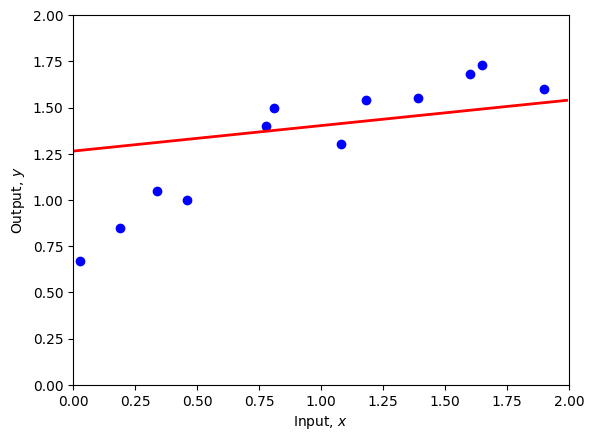

phi0: 1.250, phi1: 0.151, Loss: 0.069


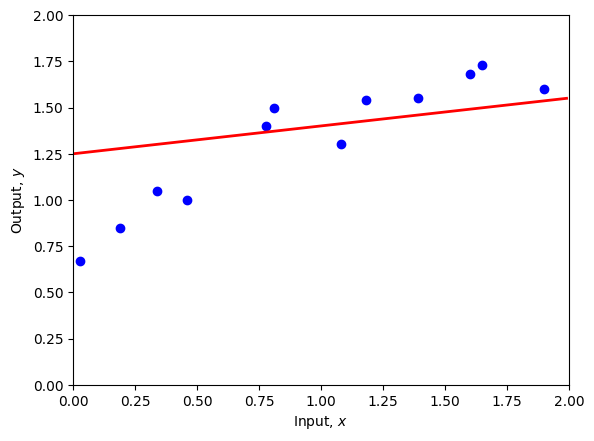

phi0: 1.236, phi1: 0.163, Loss: 0.066


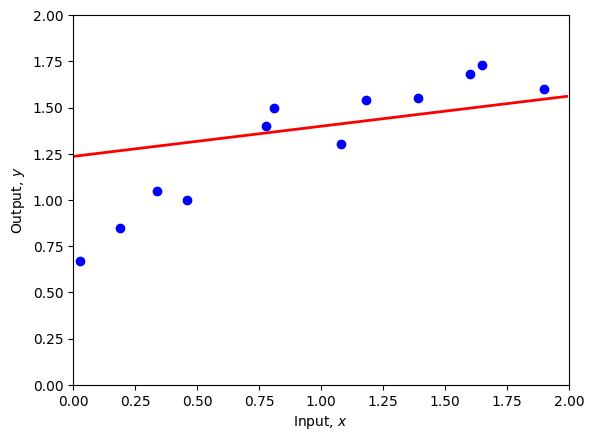

phi0: 1.222, phi1: 0.175, Loss: 0.063


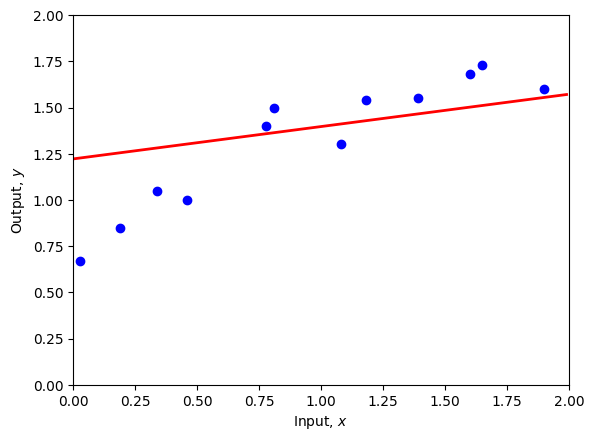

phi0: 1.209, phi1: 0.187, Loss: 0.060


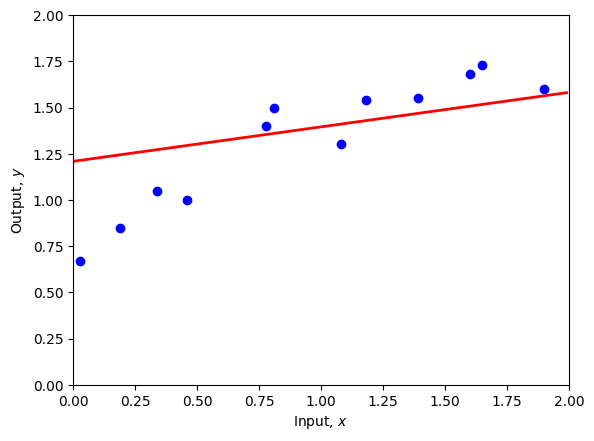

phi0: 1.196, phi1: 0.198, Loss: 0.057


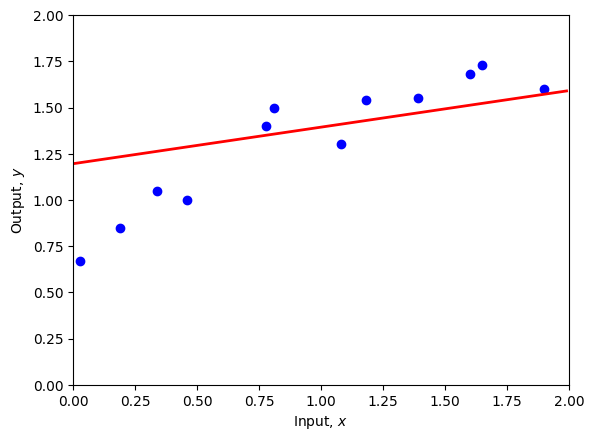

phi0: 1.184, phi1: 0.209, Loss: 0.054


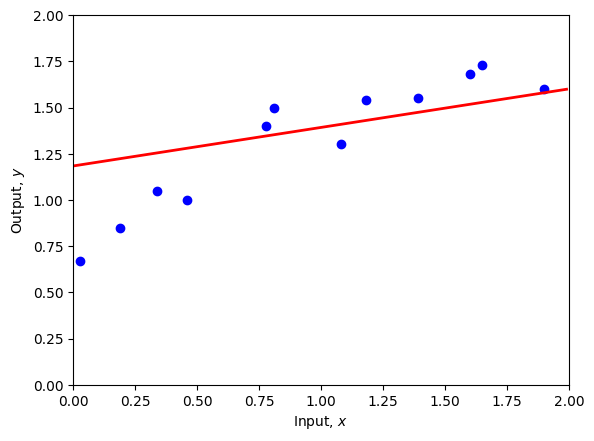

phi0: 1.172, phi1: 0.219, Loss: 0.052


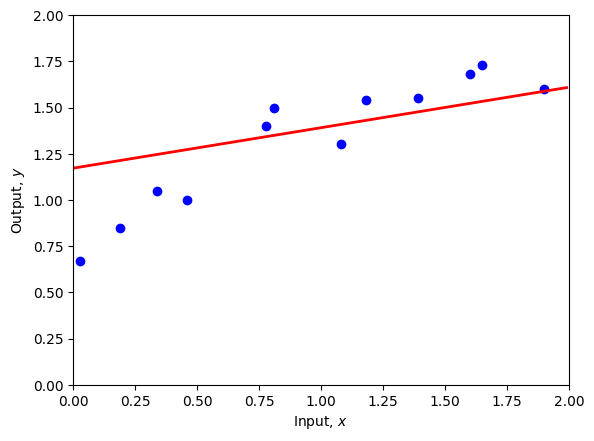

phi0: 1.160, phi1: 0.229, Loss: 0.050


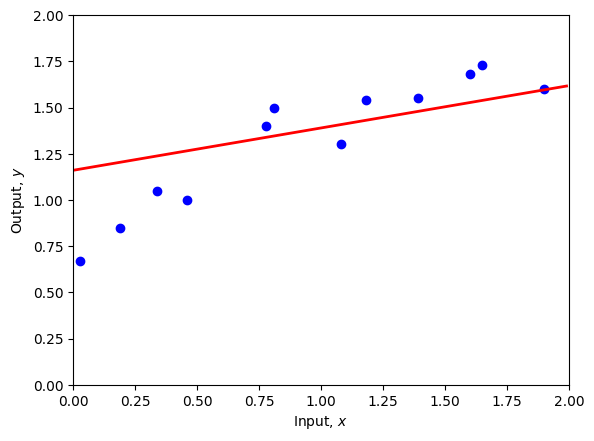

phi0: 1.149, phi1: 0.239, Loss: 0.047


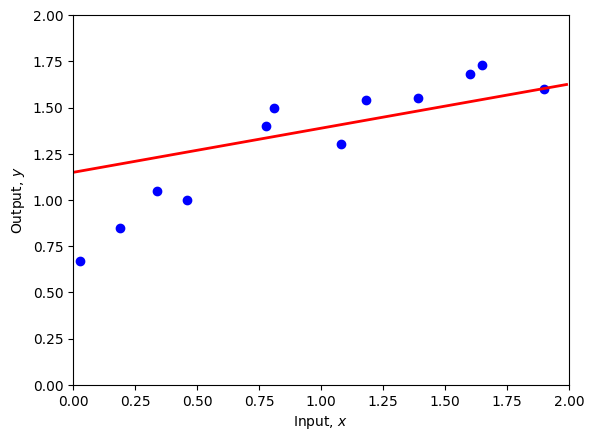

phi0: 1.138, phi1: 0.248, Loss: 0.045


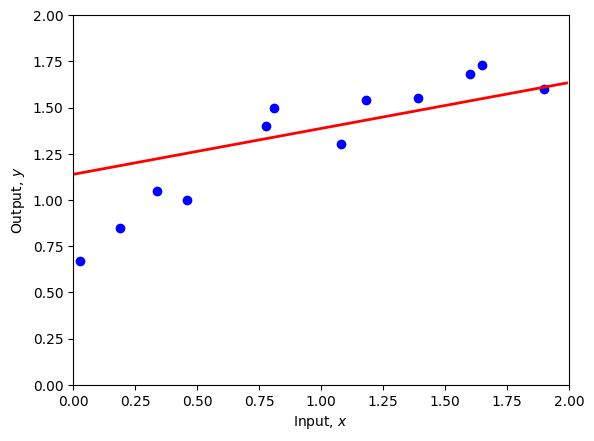

phi0: 1.128, phi1: 0.257, Loss: 0.043


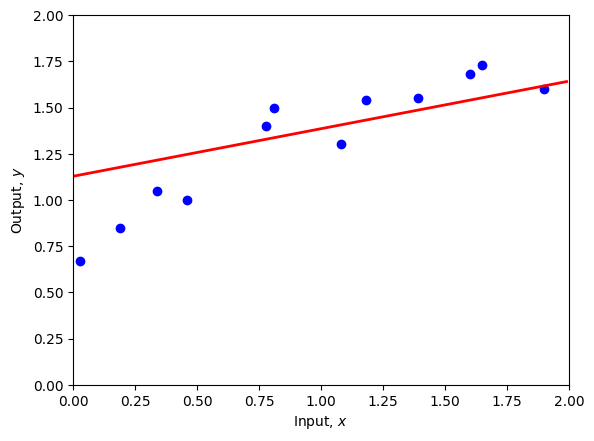

phi0: 1.118, phi1: 0.266, Loss: 0.042


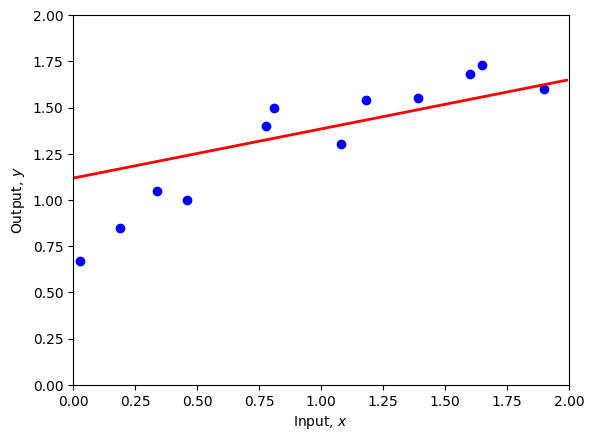

phi0: 1.108, phi1: 0.275, Loss: 0.040


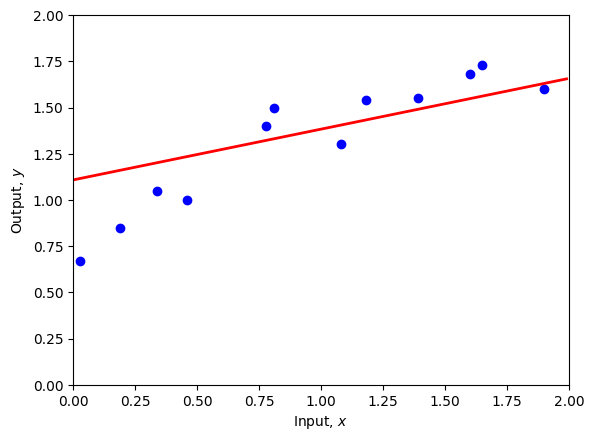

phi0: 1.099, phi1: 0.283, Loss: 0.039


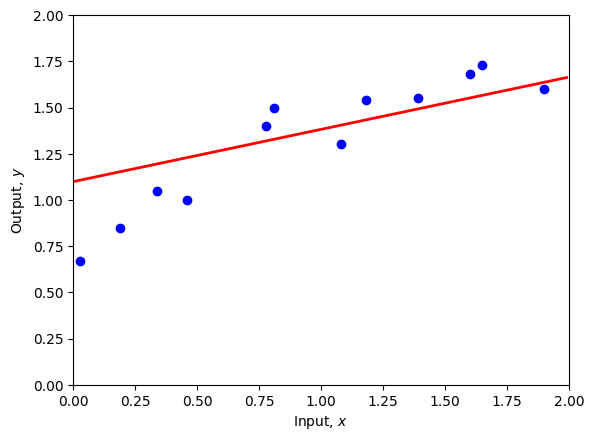

phi0: 1.090, phi1: 0.291, Loss: 0.037


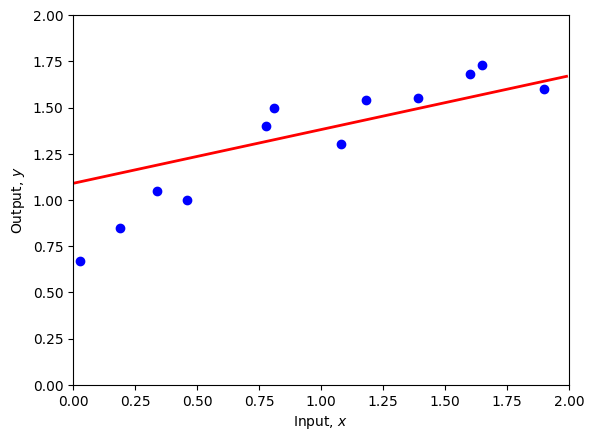

phi0: 1.081, phi1: 0.299, Loss: 0.036


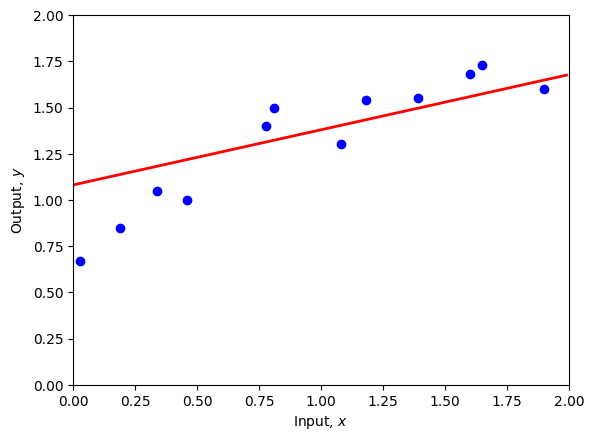

phi0: 1.072, phi1: 0.306, Loss: 0.035


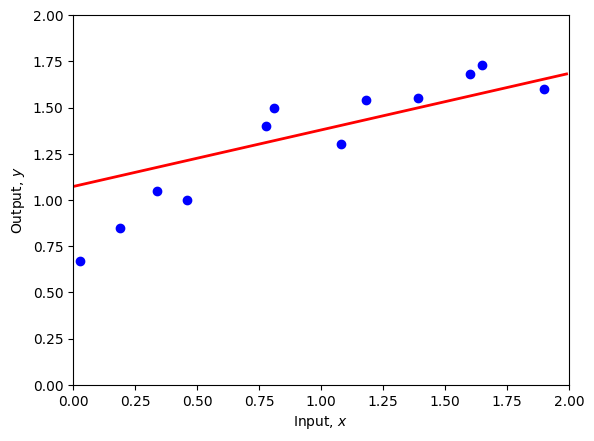

phi0: 1.064, phi1: 0.313, Loss: 0.033


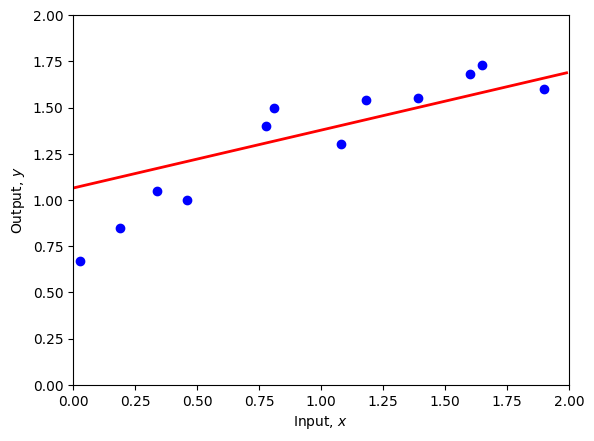

phi0: 1.056, phi1: 0.320, Loss: 0.032


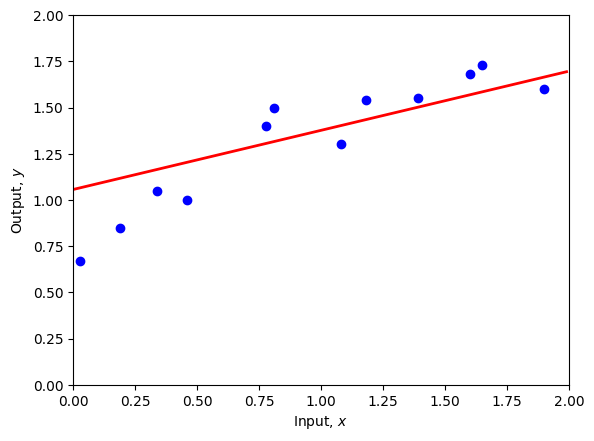

phi0: 1.049, phi1: 0.327, Loss: 0.031


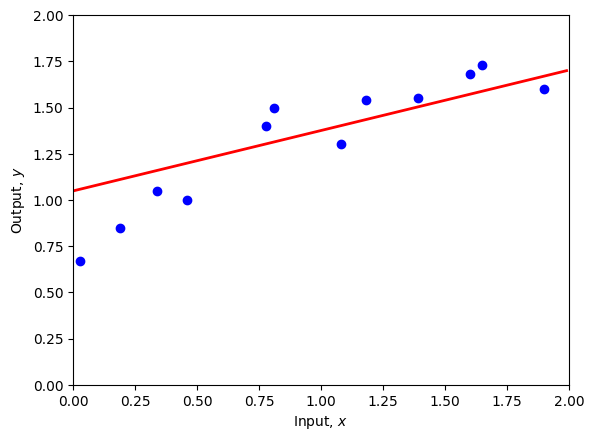

phi0: 1.041, phi1: 0.334, Loss: 0.030


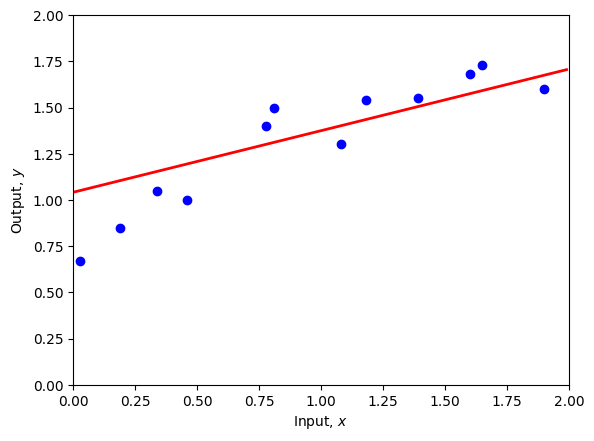

phi0: 1.034, phi1: 0.340, Loss: 0.029


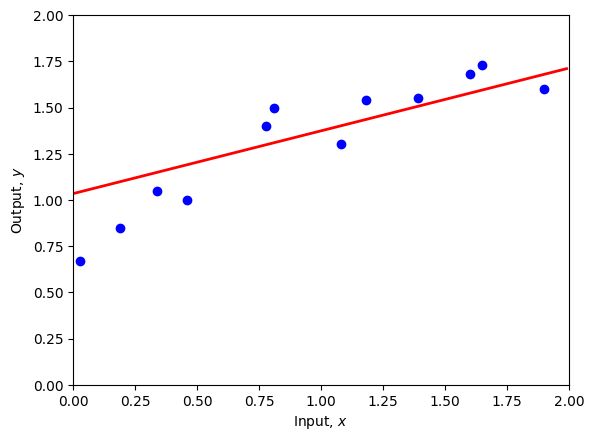

phi0: 1.027, phi1: 0.346, Loss: 0.029


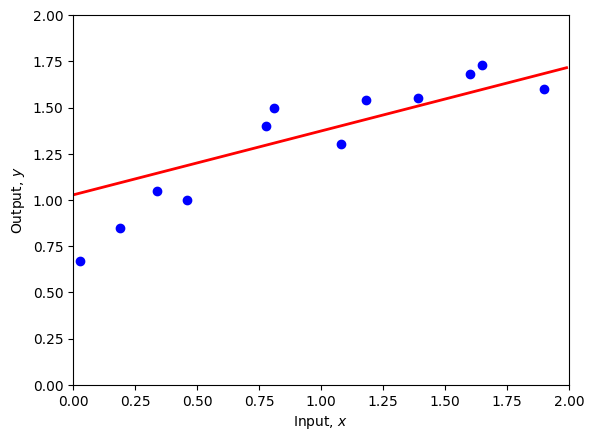

phi0: 1.020, phi1: 0.352, Loss: 0.028


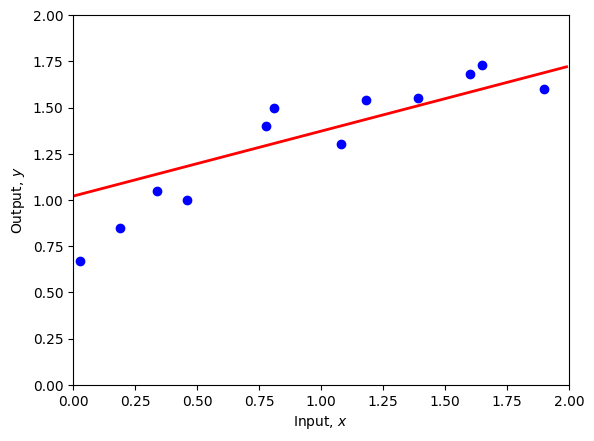

phi0: 1.014, phi1: 0.357, Loss: 0.027


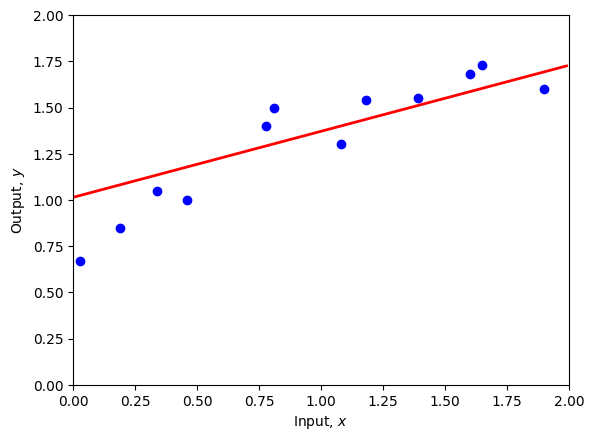

phi0: 1.008, phi1: 0.363, Loss: 0.026


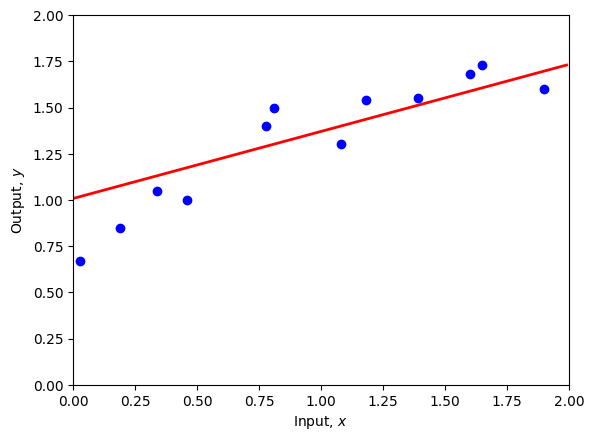

phi0: 1.002, phi1: 0.368, Loss: 0.026


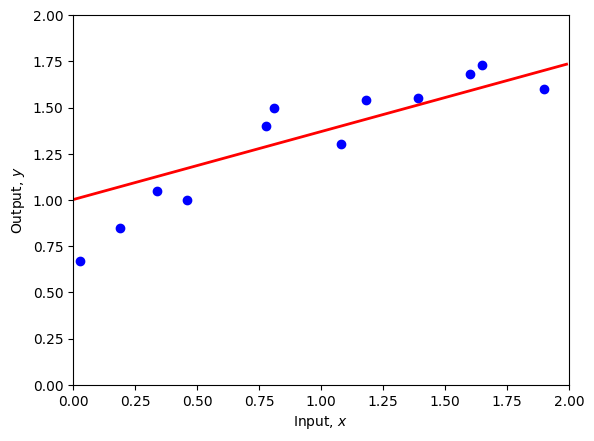

phi0: 0.996, phi1: 0.373, Loss: 0.025


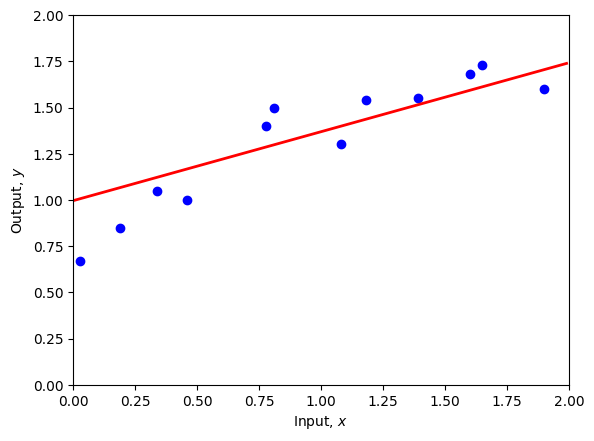

phi0: 0.990, phi1: 0.378, Loss: 0.025


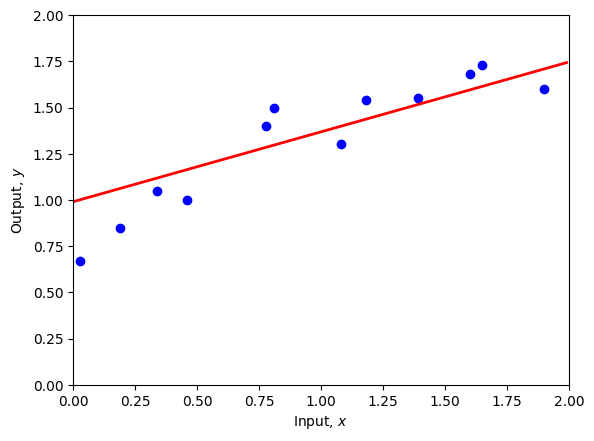

phi0: 0.985, phi1: 0.383, Loss: 0.024


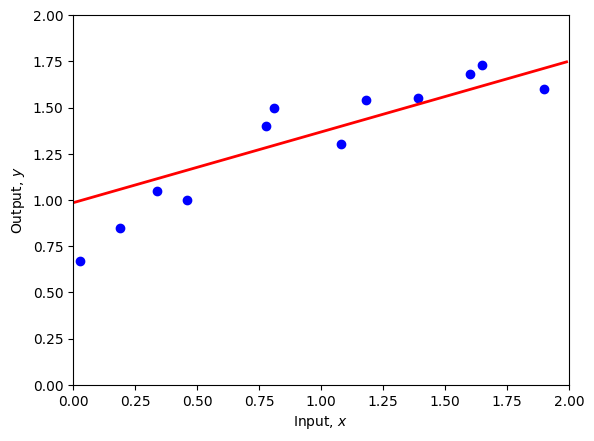

phi0: 0.979, phi1: 0.388, Loss: 0.024


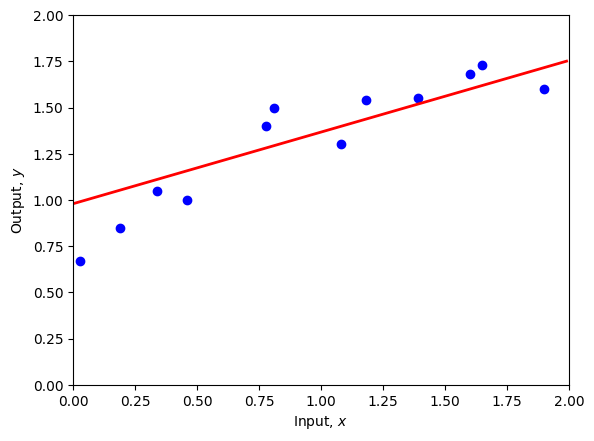

phi0: 0.974, phi1: 0.392, Loss: 0.023


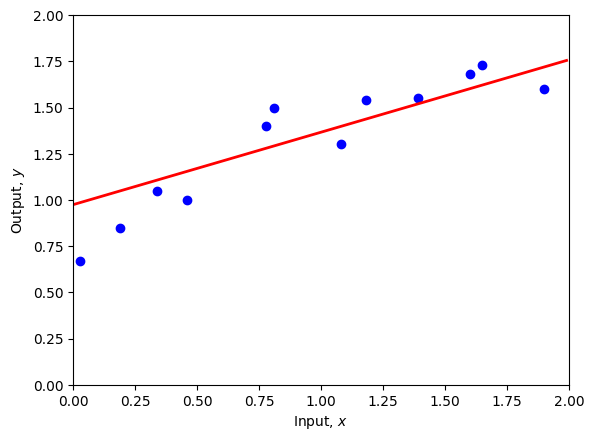

phi0: 0.969, phi1: 0.397, Loss: 0.023


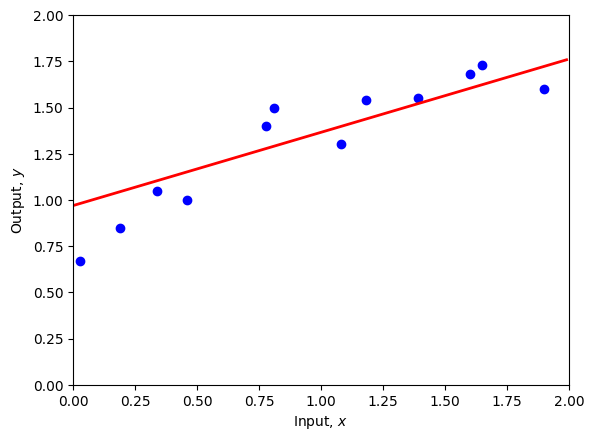

phi0: 0.965, phi1: 0.401, Loss: 0.022


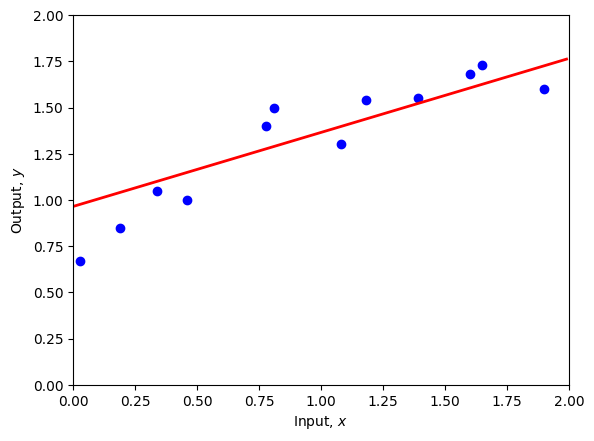

phi0: 0.960, phi1: 0.405, Loss: 0.022


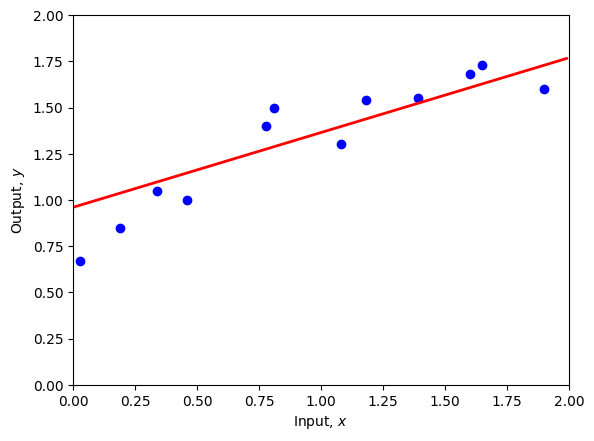

phi0: 0.956, phi1: 0.409, Loss: 0.022


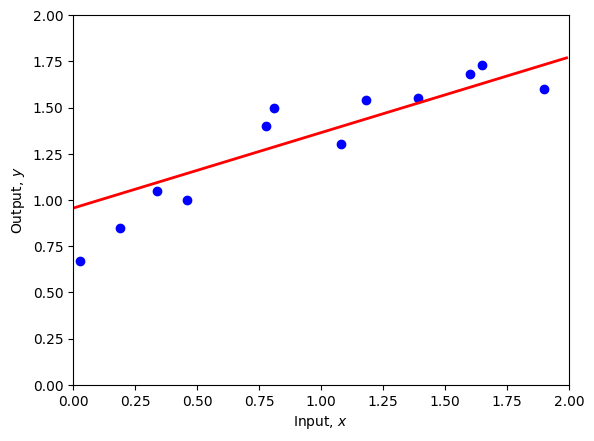

phi0: 0.951, phi1: 0.412, Loss: 0.021


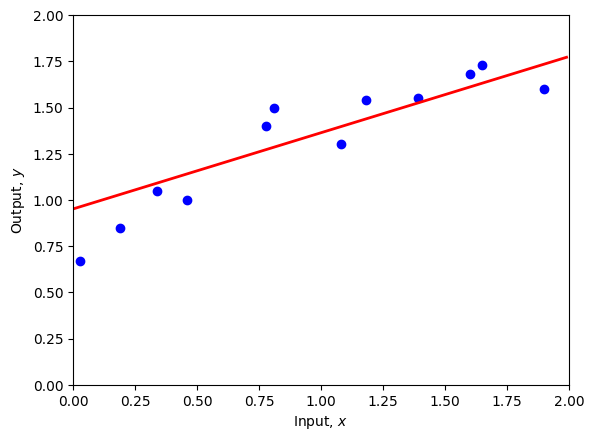

phi0: 0.947, phi1: 0.416, Loss: 0.021


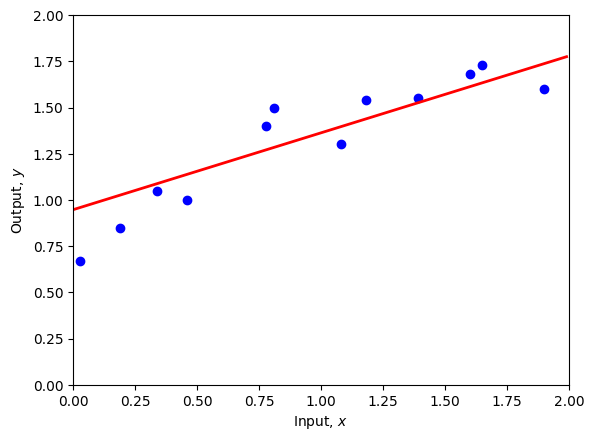

phi0: 0.943, phi1: 0.420, Loss: 0.021


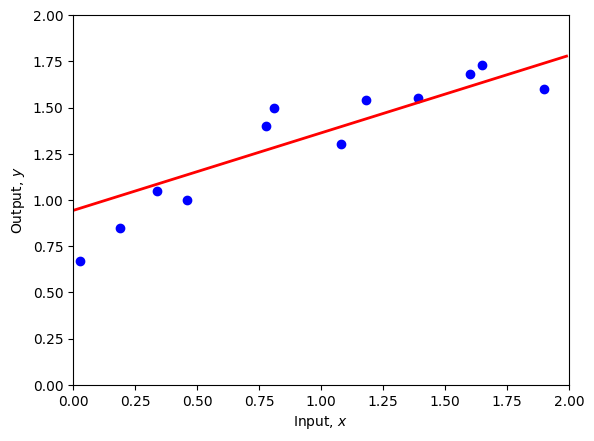

phi0: 0.939, phi1: 0.423, Loss: 0.020


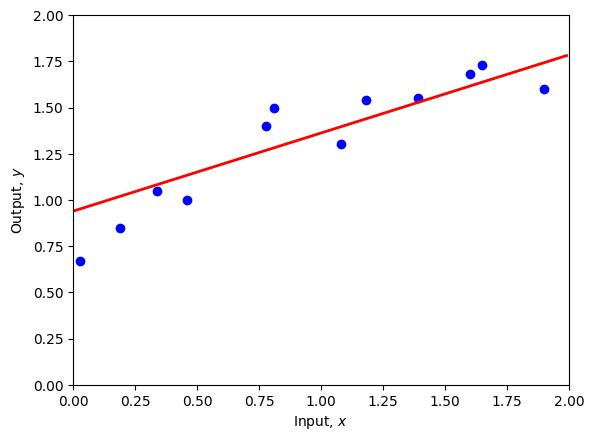

phi0: 0.935, phi1: 0.426, Loss: 0.020


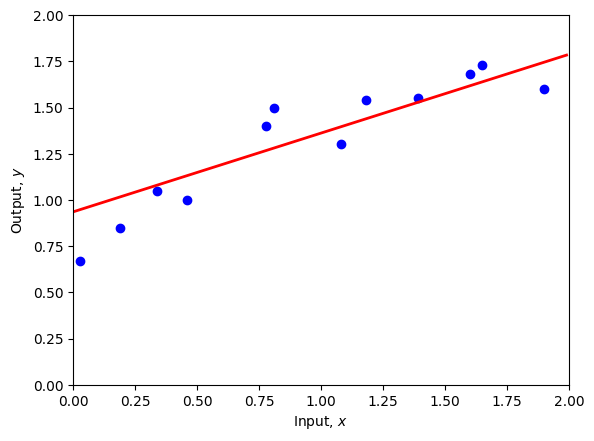

phi0: 0.932, phi1: 0.430, Loss: 0.020


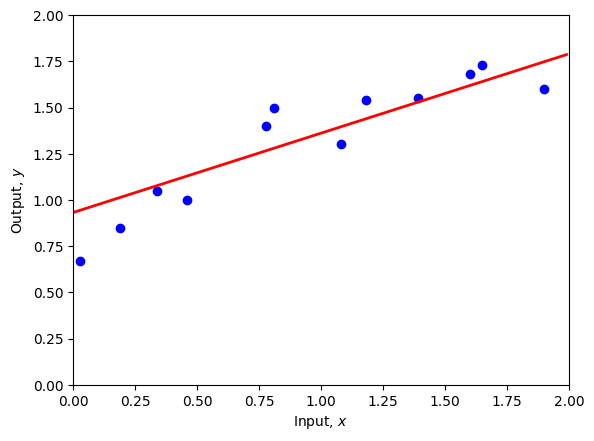

phi0: 0.928, phi1: 0.433, Loss: 0.020


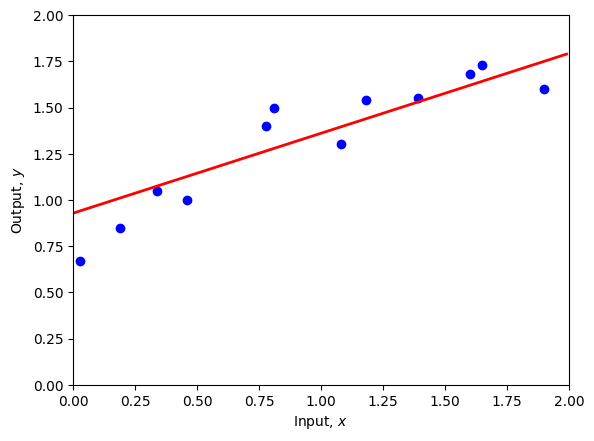

phi0: 0.925, phi1: 0.436, Loss: 0.020


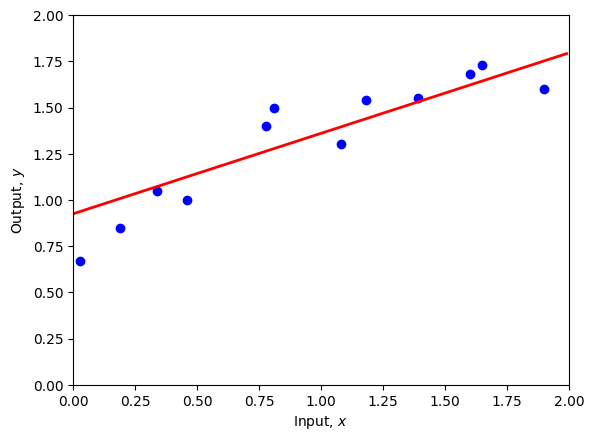

phi0: 0.921, phi1: 0.438, Loss: 0.019


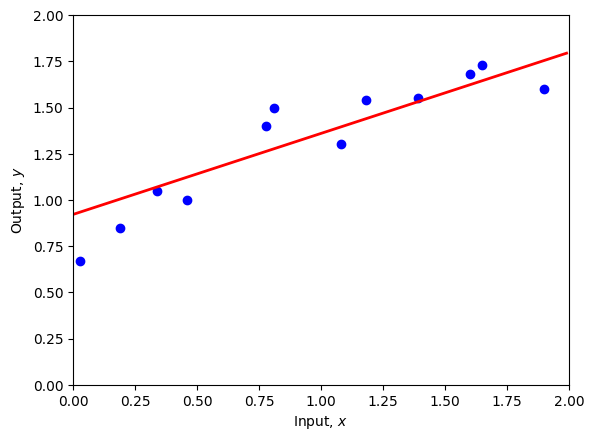

phi0: 0.918, phi1: 0.441, Loss: 0.019


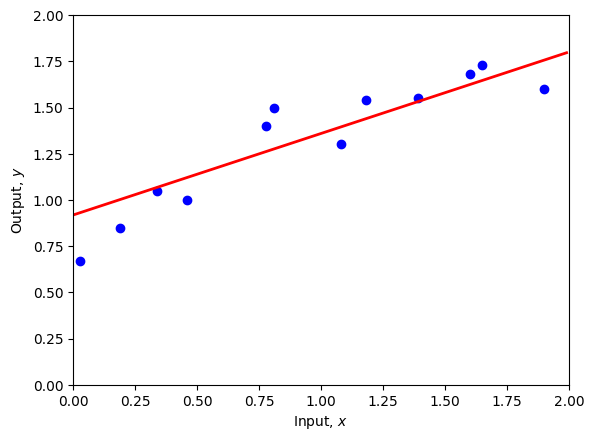

phi0: 0.915, phi1: 0.444, Loss: 0.019


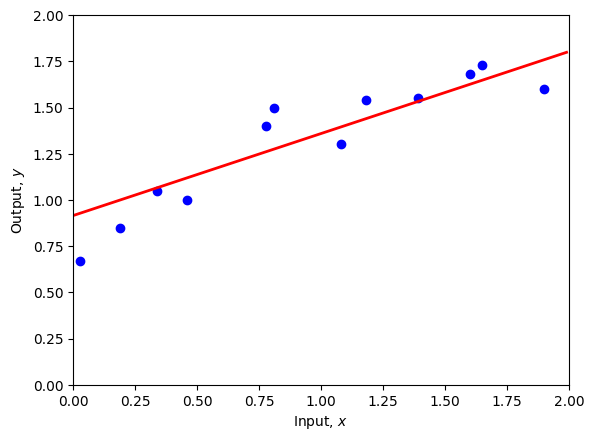

phi0: 0.912, phi1: 0.447, Loss: 0.019


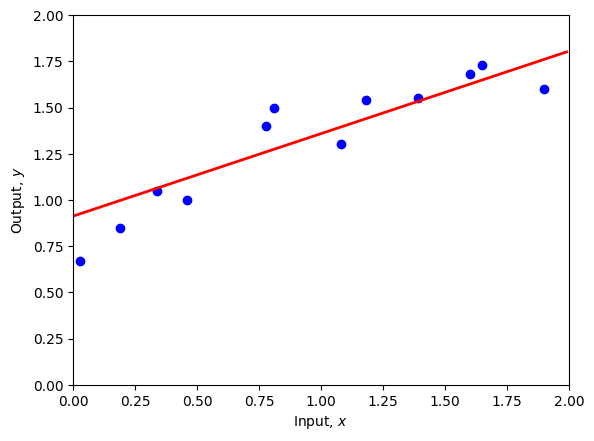

phi0: 0.909, phi1: 0.449, Loss: 0.019


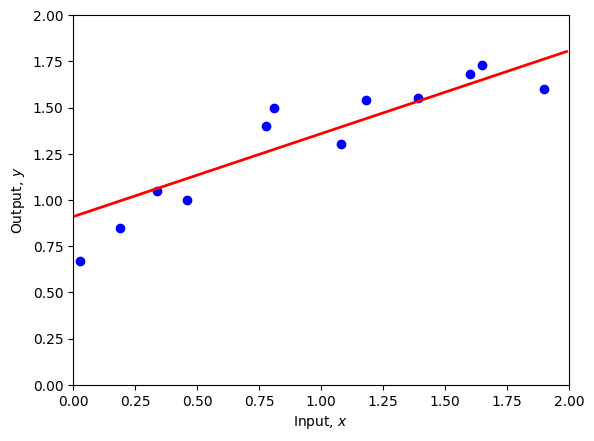

phi0: 0.907, phi1: 0.452, Loss: 0.019


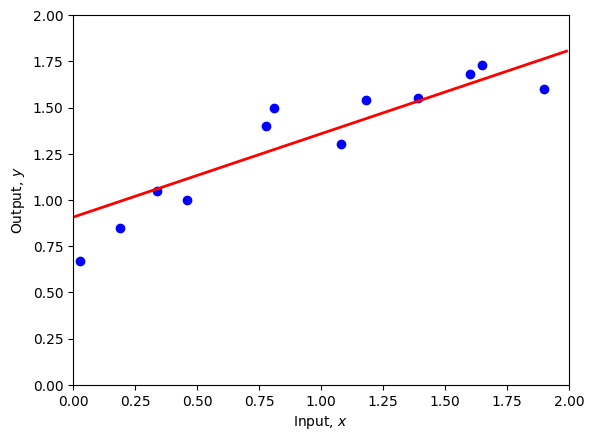

phi0: 0.904, phi1: 0.454, Loss: 0.018


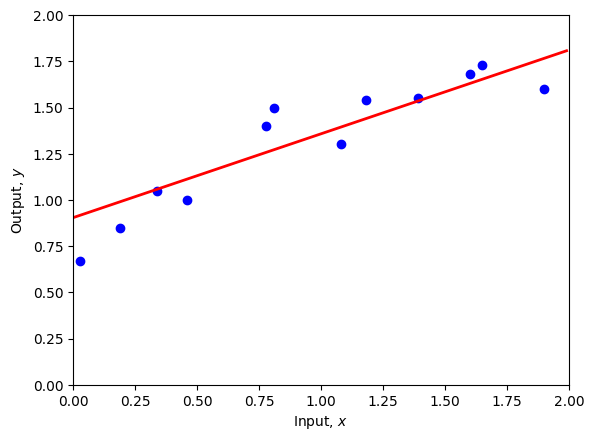

phi0: 0.901, phi1: 0.456, Loss: 0.018


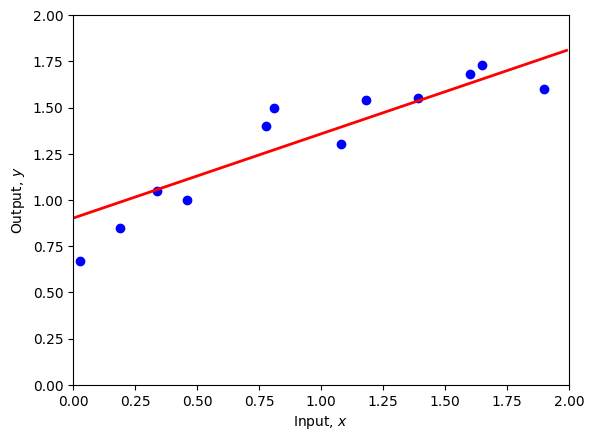

phi0: 0.899, phi1: 0.458, Loss: 0.018


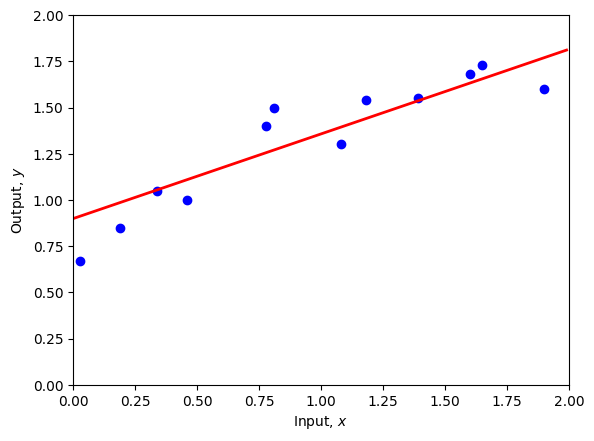

phi0: 0.896, phi1: 0.460, Loss: 0.018


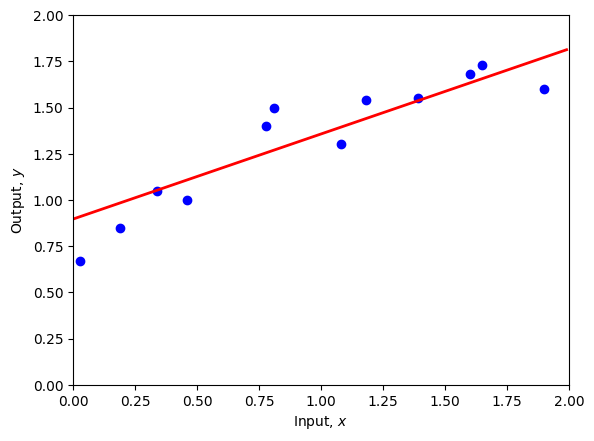

phi0: 0.894, phi1: 0.463, Loss: 0.018


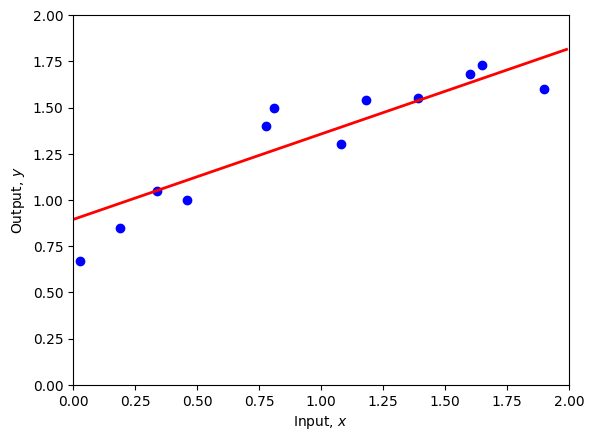

phi0: 0.892, phi1: 0.465, Loss: 0.018


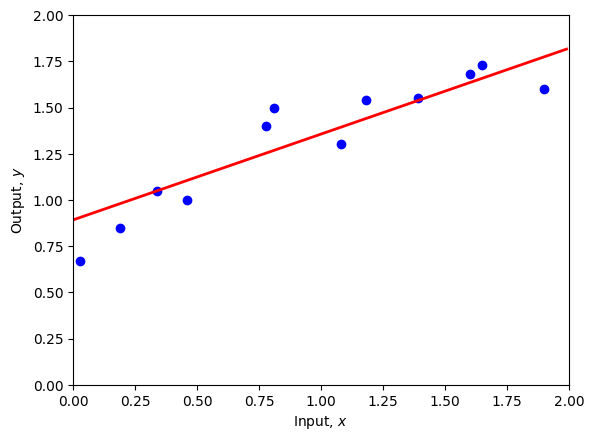

phi0: 0.890, phi1: 0.466, Loss: 0.018


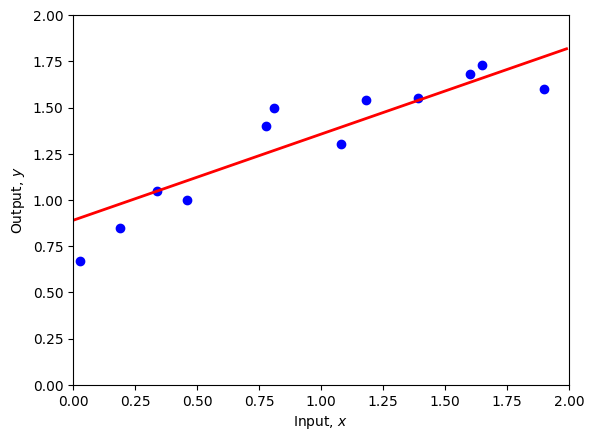

phi0: 0.887, phi1: 0.468, Loss: 0.018


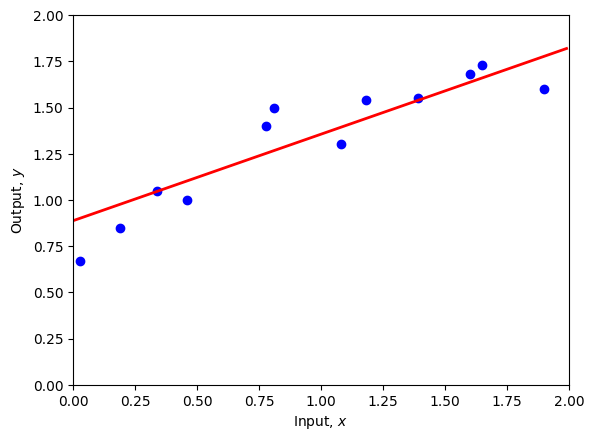

phi0: 0.885, phi1: 0.470, Loss: 0.018


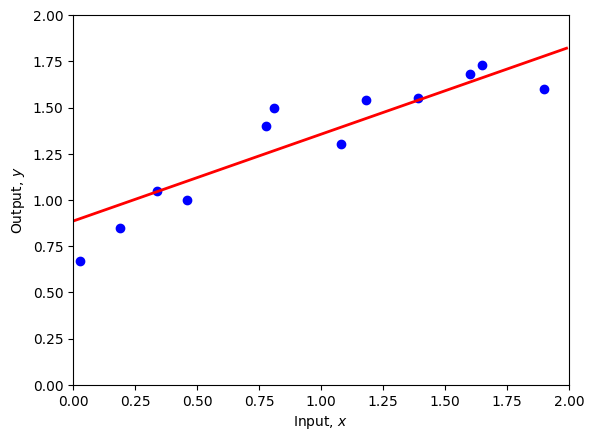

phi0: 0.883, phi1: 0.472, Loss: 0.018


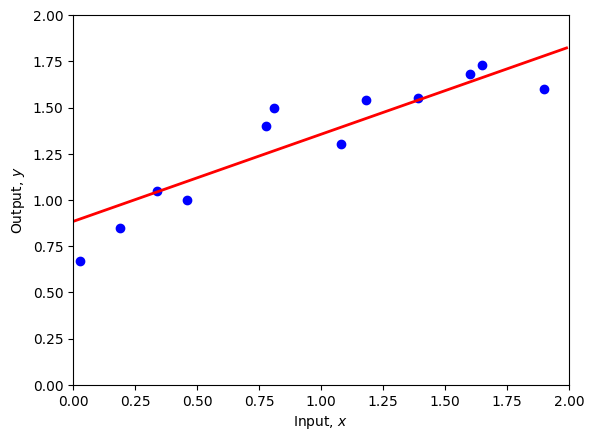

phi0: 0.882, phi1: 0.473, Loss: 0.018


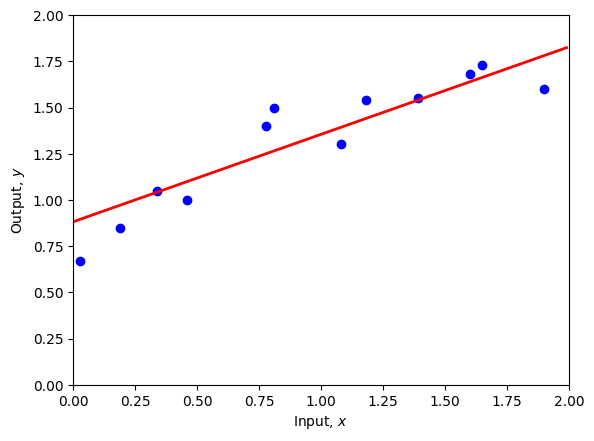

phi0: 0.880, phi1: 0.475, Loss: 0.018


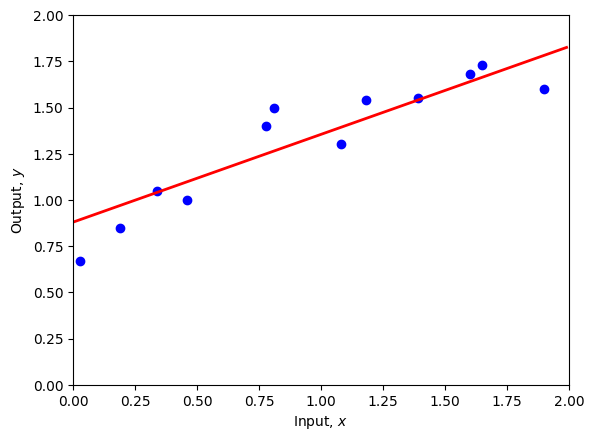

phi0: 0.878, phi1: 0.477, Loss: 0.017


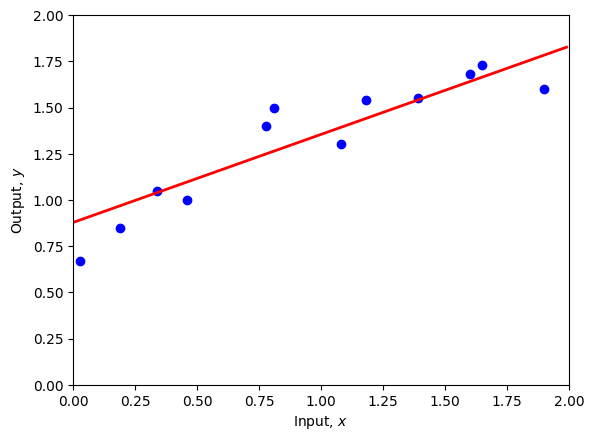

phi0: 0.876, phi1: 0.478, Loss: 0.017


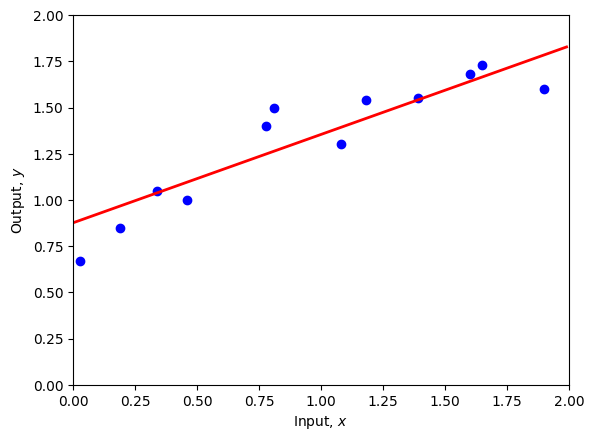

phi0: 0.874, phi1: 0.480, Loss: 0.017


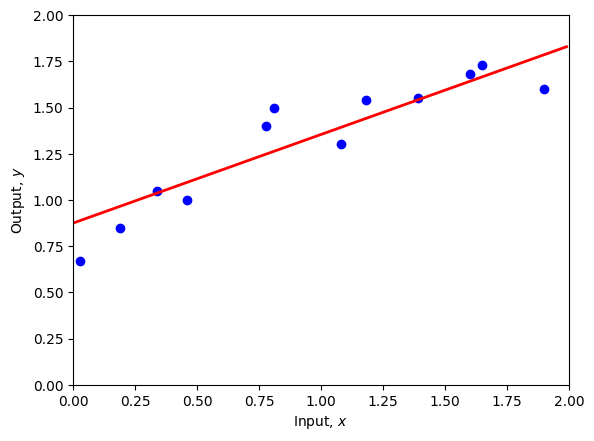

phi0: 0.873, phi1: 0.481, Loss: 0.017


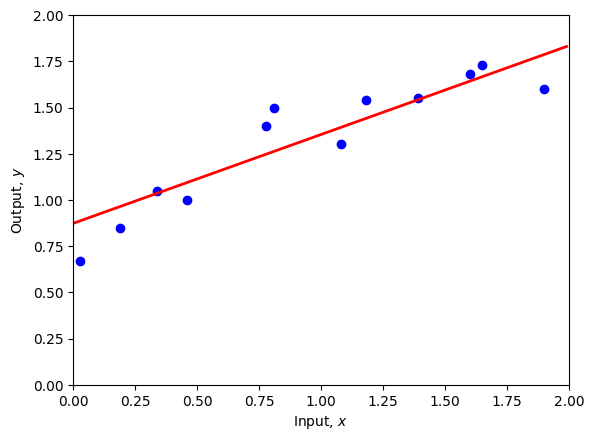

phi0: 0.871, phi1: 0.482, Loss: 0.017


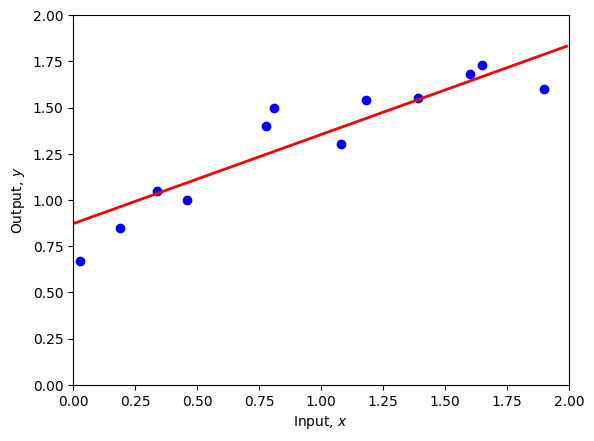

phi0: 0.870, phi1: 0.484, Loss: 0.017


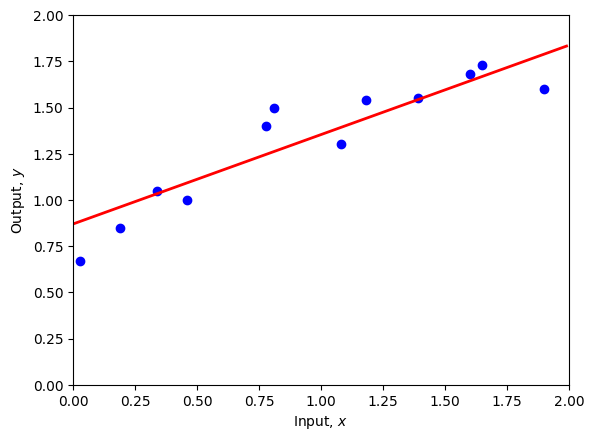

phi0: 0.868, phi1: 0.485, Loss: 0.017


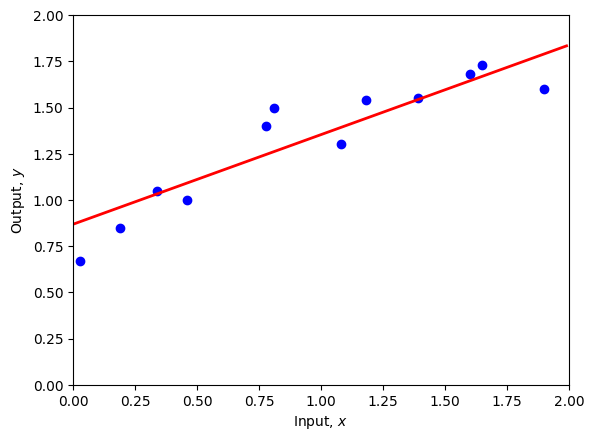

phi0: 0.867, phi1: 0.486, Loss: 0.017


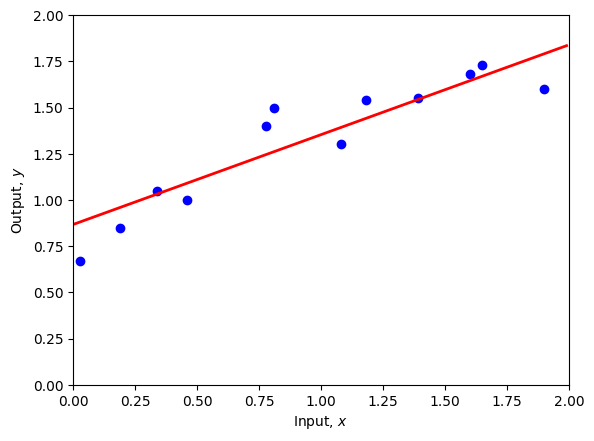

phi0: 0.866, phi1: 0.487, Loss: 0.017


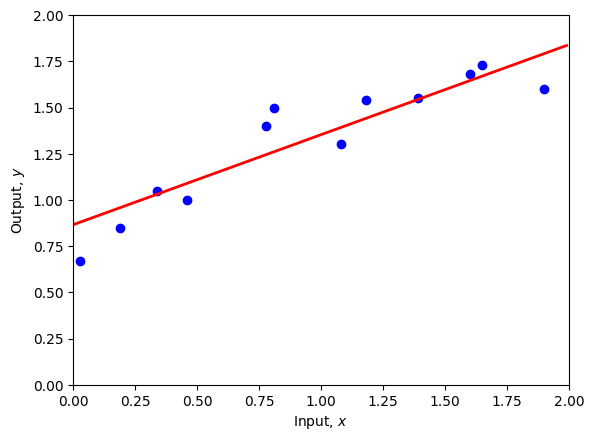

phi0: 0.864, phi1: 0.489, Loss: 0.017


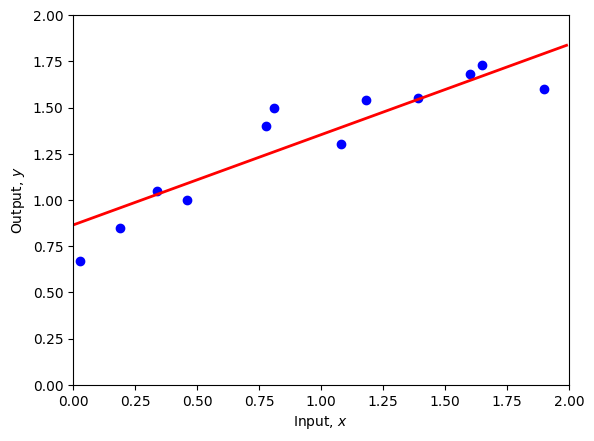

phi0: 0.863, phi1: 0.490, Loss: 0.017


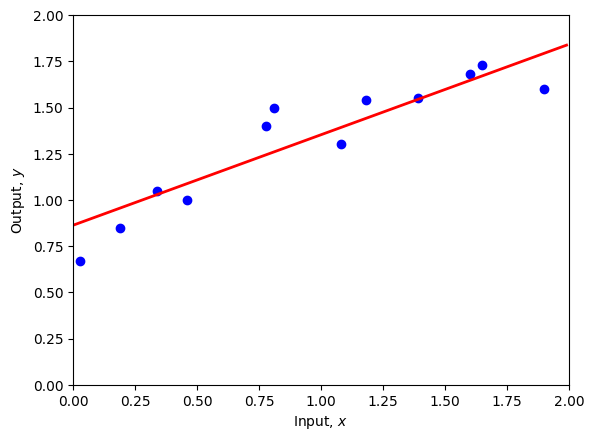

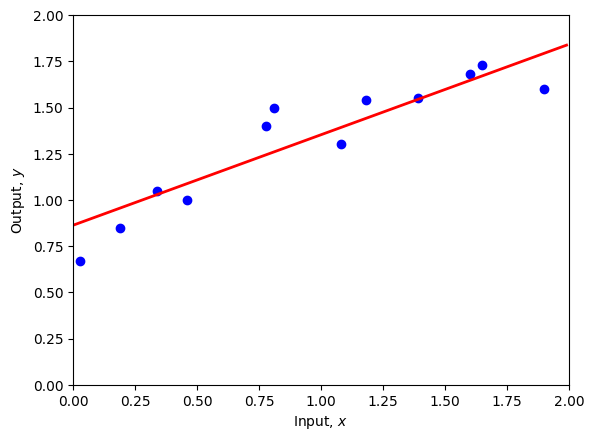

Your Loss = 0.02
Learned parameters: phi0 = 0.863, phi1 = 0.490


In [18]:
phi0, phi1 = gradient_descent(x, y, phi0, phi1)
plot(x,y,phi0,phi1)
# print Loss
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')
# Print learned parameters
print(f"Learned parameters: phi0 = {phi0:.3f}, phi1 = {phi1:.3f}")

# linear regression using scikitlearn to learn this model

Input (x): [0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
Output (y): [0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]
Learned parameters: phi0 = 0.826, phi1 = 0.522
Mean Squared Error (MSE) Loss: 0.017


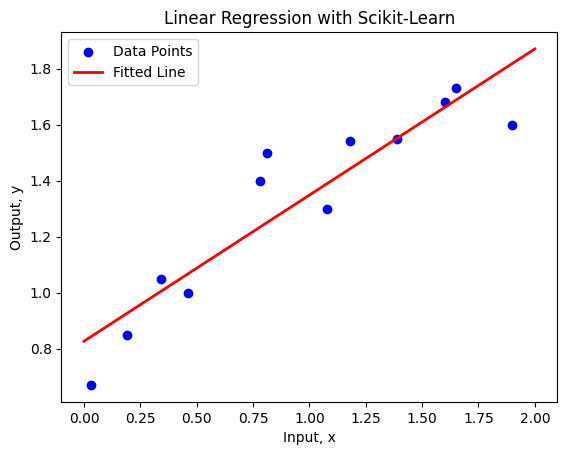

In [19]:
# Note that Scikit-learn has't hyperparameters like : learning-rate - num of epoches
# as LinearRegression model () use close form solutoin using normal Equation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create some input / output data
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])
print("Input (x):", x)
print("Output (y):", y)

# Reshape x for sklearn (as it expects a 2D array)
x_reshaped = x.reshape(-1, 1)

# Train Linear Regression Model
model = LinearRegression()
model.fit(x_reshaped, y)

# Extract learned parameters
phi0 = model.intercept_  # Intercept
phi1 = model.coef_[0]    # Slope

# Print learned parameters
print(f"Learned parameters: phi0 = {phi0:.3f}, phi1 = {phi1:.3f}")

# Predict y values for training data
y_pred_train = model.predict(x_reshaped)

# Compute Mean Squared Error (MSE) Loss
mse = mean_squared_error(y, y_pred_train)
print(f"Mean Squared Error (MSE) Loss: {mse:.3f}")

# Predict y values for plotting
x_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(x_line)

# Plot the data and regression line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_line, y_pred, 'r-', lw=2, label='Fitted Line')
plt.xlabel('Input, x')
plt.ylabel('Output, y')
plt.title('Linear Regression with Scikit-Learn')
plt.legend()
plt.show()



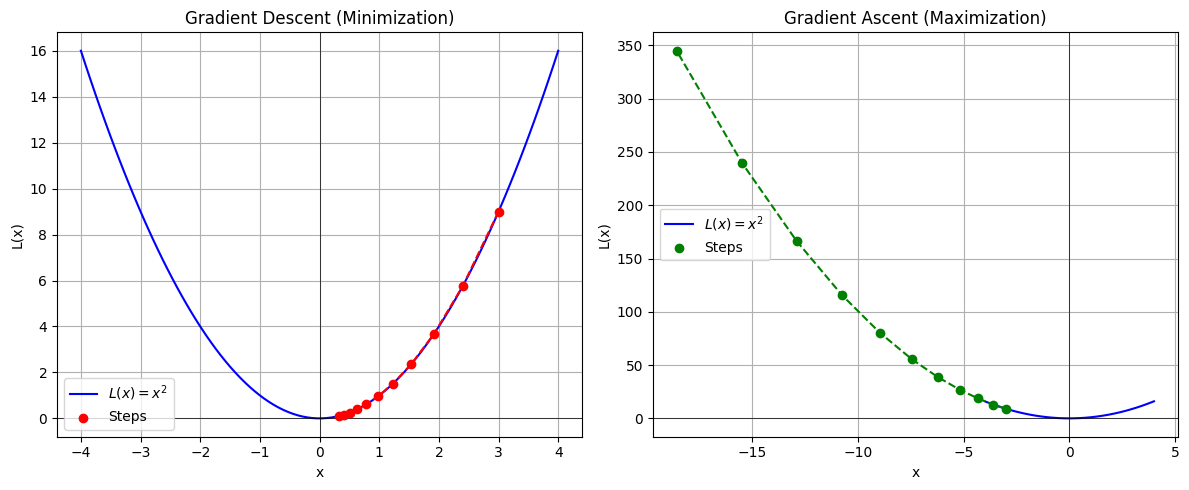